## Capstone 1: Heart Disease 

Thinkful : Data Science

April 24, 2019

By: Corey Coole

## Data

The dataset used in this project comes from four different sources.
    
     1. Cleveland Clinic Foundation 
     2. Hungarian Institute of Cardiology, Budapest 
     3. V.A. Medical Center, Long Beach, CA 
     4. University Hospital, Zurich, Switzerland 

The raw dataset contains 76 attributes, however all published experiments refer to using a set of 14 chosen from the larger collection. Thise 14 data indicators are age, sex, chest pain type, resting blood pressure, cholesterol level, fasting blood sugar, resting electrocardiographic results maximum heart rate achieved, exercize induced angina(true/false), ST depression induced by exercize related to rest, the slope of the peak exercize ST segment, number of major vessels colored by fluorosopy, thallium test result, heart disease risk value. The attributes were gathered to study and try to predict the presence of heart disease in a patient. The risk value refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. This report does not investigate any further than how such risk values were attributed. 
   
It is unclear however, if the patients were admitted into the hospital's care because of suspected heart disease risk or if the patients come from a more general selection pool. Thusly, these results may not reflect a wide percentage of the population at hand. It is also recognizd that this dataset was curated no later then July 1988, as such this dataset would not reflect the results of present day trends of health and culture with respect to heart disease. 

With that said, this report addresses three seperate questions relating to the nature and statistical relationship between the distinct locations of the data as well as some of the attributes therein. The questions are as follows:

Question 1 - Does there seem to be an average prediction risk value of heart disease shared among the data, or does one location stand out from the rest?

Question 2 - Does the data reflect an increased risk for heart disease in older patients?

Question 3 - How probable is a patient in the dataset to have a higher than average risk of heart disease if their cholesterol level is above 200 mg/dL?

## Analysis

If we are to ascertain any results based upon averages and standard deviations wih respect to the dataset, we would first like to address the normality of the data set. Plotting each location's Age data frame against a sample set in a QQplot will tell us if the collected age instances of each data set tend too much to the older or younger years, as well as highlight the presence of any outliers we may have to deal with going forward. Although each qqplot has a generally linear trend, we note that all data sets in this study contain traces of tails, and inherently outliers with respect to age. Overall the linear trend of each qqplot seem to suggest a high probability of normality, thusly we continue on to address some finer points of interest in this study.

In [1]:
import numpy as np # Import necessary libraries
import pandas as pd  
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
    
df_clv = pd.read_csv('cleveland.names.csv', sep=',') # Read the four raw .csv file, store into data frames
df_clv.replace('?', 0, inplace=True)

df_lngb = pd.read_csv('va.names.csv', sep=',')
df_lngb.replace('?', 0, inplace=True)

df_swtz = pd.read_csv('switz.names.csv', sep=',')
df_swtz.replace('?', 0, inplace=True)

df_hun = pd.read_csv('hungarian.names.csv', sep=',')
df_hun.replace('?', 0, inplace=True)

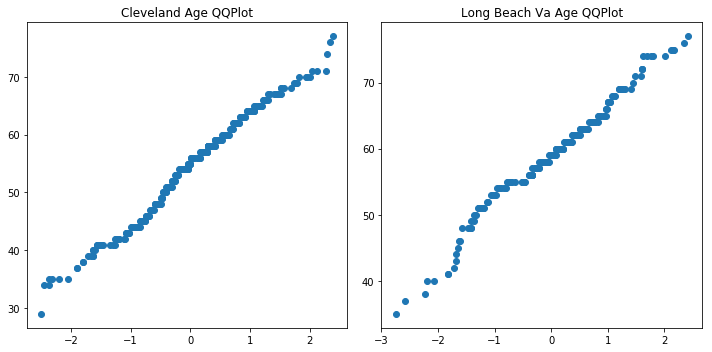

In [2]:
def select_columns(data_frame, column_names): # create a function to select specific data column from data frame
    new_frame = data_frame.loc[:, column_names]
    return new_frame

selected_columns = ['Age']

clv_ages = select_columns(df_clv, selected_columns)
sorted_clv_ages = clv_ages.sort_values(by='Age', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

lngb_ages = select_columns(df_lngb, selected_columns)
sorted_lngb_ages = lngb_ages.sort_values(by='Age', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
 
norm1 = np.random.normal(0, 1, len(sorted_clv_ages)) # Create sets of random normal data to chart against actual data
norm1.sort() 
norm2 = np.random.normal(0, 1, len(sorted_lngb_ages))
norm2.sort()

plt.figure(figsize=(10, 5)) # Create QQplot to investigate the normality of age data 
           
plt.subplot(1, 2, 1)
plt.plot(norm1, sorted_clv_ages , "o") 
plt.title('Cleveland Age QQPlot')           
plt.subplot(1, 2, 2)
plt.plot(norm2, sorted_lngb_ages , "o")  
plt.title('Long Beach Va Age QQPlot') 

plt.tight_layout()
plt.show()


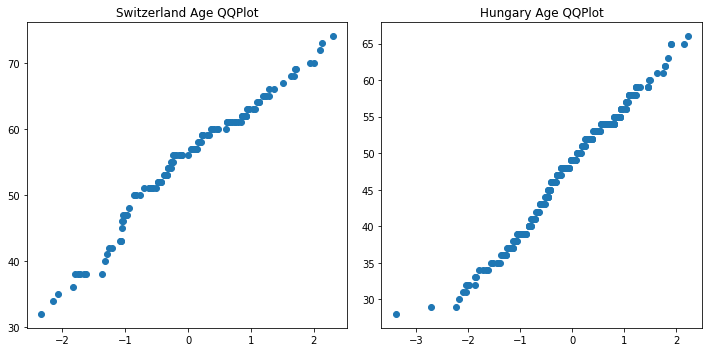

In [8]:
def select_columns(data_frame, column_names): # create a function to select specific data column from data frame
    new_frame = data_frame.loc[:, column_names]
    return new_frame

selected_columns = ['Age']

swtz_ages = select_columns(df_swtz, selected_columns)
sorted_swtz_ages = swtz_ages.sort_values(by='Age', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

hun_ages = select_columns(df_hun, selected_columns)
sorted_hun_ages = hun_ages.sort_values(by='Age', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

norm3 = np.random.normal(0, 1, len(sorted_swtz_ages)) # Create sets of random normal data to chart against actual data 
norm3.sort()
norm4 = np.random.normal(0, 1, len(sorted_hun_ages))
norm4.sort()

plt.figure(figsize=(10, 5)) # Create QQplot to investigate the normality of age data 
           
plt.subplot(1, 2, 1)
plt.plot(norm3, sorted_swtz_ages , "o")
plt.title('Switzerland Age QQPlot') 
           
plt.subplot(1, 2, 2)
plt.plot(norm4, sorted_hun_ages , "o") 
plt.title('Hungary Age QQPlot') 

plt.tight_layout()
plt.show()



As we see the Age data plotted against a rando normal variable, each location's QQplot follows a relatively linear trend. In this way, I am encouraged to go ahead and continue analysis. However there are noticeable outliers present in the tails of the data. We will take care of these values later.

I also create histograms based upon the age data to get a sense of the shape and spread of each dataset. The collections do not seem to reflect harsh skewness and there seems to be a fair amount of overlap in each locatino's age data. Though we cannot infer much else until we have done sufficient calculations for interpreting the averages. 

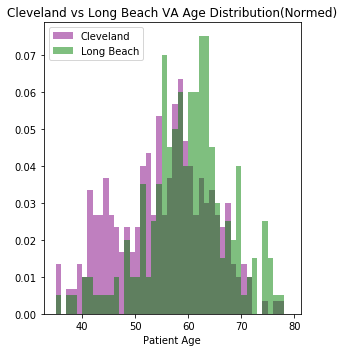

In [30]:
from matplotlib.patches import Rectangle 

plt.figure(figsize=(9,5)) # Create Histogram to investigate the spread and shape of Age data 

plt.subplot(1, 2, 1)
plt.hist(df_clv["clv_age"], normed=True, color='purple', bins=np.arange(35, 80), alpha=.5) 

plt.subplot(1, 2, 1)
plt.hist(df_lngb["lngb_age"], normed=True, color='green', bins=np.arange(35, 80), alpha=.5)

plt.xlabel('Patient Age')
plt.title('Cleveland vs Long Beach VA Age Distribution(Normed)')
plt.legend(['Cleveland', 'Long Beach'])
plt.tight_layout()
plt.show()


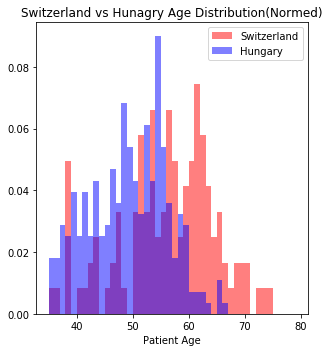

In [31]:
df_swtz["swtz_age"] = pd.read_csv('switz.names.csv', usecols=[0])
df_hun["hun_age"] = pd.read_csv('hungarian.names.csv', usecols=[0])

plt.figure(figsize=(9,5)) # Create Histogram to investigate the spread and shape of Age data

plt.subplot(1, 2, 1)
plt.hist(df_swtz["swtz_age"], normed=True, color='red', bins=np.arange(35, 80), alpha=.5) 

plt.subplot(1, 2, 1)
plt.hist(df_hun["hun_age"], normed=True, color='blue', bins=np.arange(35, 80), alpha=.5)

plt.xlabel('Patient Age')
plt.title('Switzerland vs Hunagry Age Distribution(Normed)')
plt.legend(['Switzerland', 'Hungary'])
plt.tight_layout()
plt.show()

## Question 1

If each location's risk avergae is to be compared, we must take cre of any outliers that might hold too much influence over the calculations. Using the age data as in the QQplots above, outliers + or - 2 standard deviations of the theoretical mean are taken out of the parent dataset. In application through boxplot analysis, the VA Medical Center,California data and University Hospital, Switzerland were found to have outliers present and thus only these datasets required outlier extraction.

Using the Age dat from each location, respective box and whisker plots show that no more outliers with respect to age  remain in the data frame.

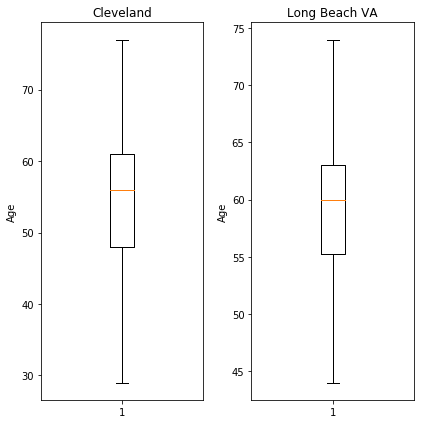

In [3]:
df_clv["clv_age"] = pd.read_csv('cleveland.names.csv', usecols=[0]) # Different method to extract column data

df_lngb["lngb_age"] = pd.read_csv('va.names.csv', usecols=[0])
df_lngb_remove_outliers = df_lngb[((df_lngb.Age - df_lngb.Age.mean()) / df_lngb.Age.std()).abs() < 2] 
                                                    # Remove outliers from long beach data(+-2 stds of the mean)
df_lngb_clean = df_lngb_remove_outliers["Age"]

plt.figure(figsize=(6,6)) # Create Box and Whisker plots to check for outliers in the data 

plt.subplot(1, 2, 1)
plt.boxplot(df_clv["clv_age"])
plt.ylabel('Age')
plt.title('Cleveland')

plt.subplot(1, 2, 2)
plt.boxplot(df_lngb_clean)
plt.ylabel('Age')
plt.title('Long Beach VA')

plt.tight_layout()
plt.show()


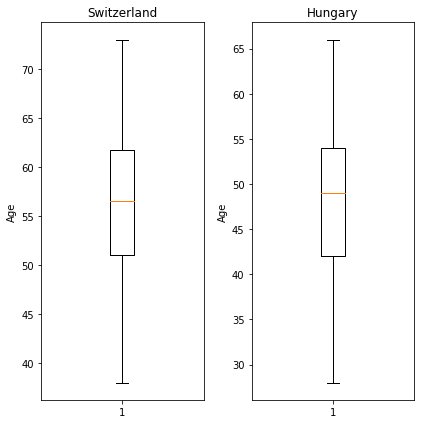

In [17]:
df_swtz["switz_age"] = pd.read_csv('switz.names.csv', usecols=[0])
df_swtz_remove_outliers = df_swtz[((df_swtz.Age - df_swtz.Age.mean()) / df_swtz.Age.std()).abs() < 2]
                                                    # Remove outliers from long beach data(+-2 stds of the mean)
df_swtz_clean = df_swtz_remove_outliers["Age"]

df_hun["hun_age"] = pd.read_csv('hungarian.names.csv', usecols=[0])
                                                    
plt.figure(figsize=(6,6)) # Create Box and Whisker plots to check for outliers in the data 

plt.subplot(1, 2, 1)
plt.boxplot(df_swtz_clean)
plt.ylabel('Age')
plt.title('Switzerland')

plt.subplot(1, 2, 2)
plt.boxplot(df_hun["hun_age"])
plt.ylabel('Age')
plt.title('Hungary')

plt.tight_layout()
plt.show()

I check also the risk value data of each location for outliers as well. With none found present, I am more encouraged that calculations will result in meaningful means and standard deviations.

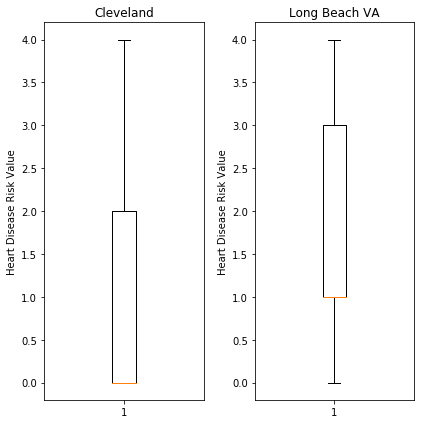

In [11]:
df_clv["clv_hdv"] = pd.read_csv('cleveland.names.csv', usecols=[13])

df_lngb_clean = df_lngb_remove_outliers["PredHrtDis"]

plt.figure(figsize=(6,6)) # Create Box and Whisker plot of Heart Disease Risk to check for the presence of outliers

plt.subplot(1, 2, 1)
plt.boxplot(df_clv["clv_hdv"])
plt.ylabel('Heart Disease Risk Value')
plt.title('Cleveland')

plt.subplot(1, 2, 2)
plt.boxplot(df_lngb_clean)
plt.ylabel('Heart Disease Risk Value')
plt.title('Long Beach VA')

plt.tight_layout()
plt.show()


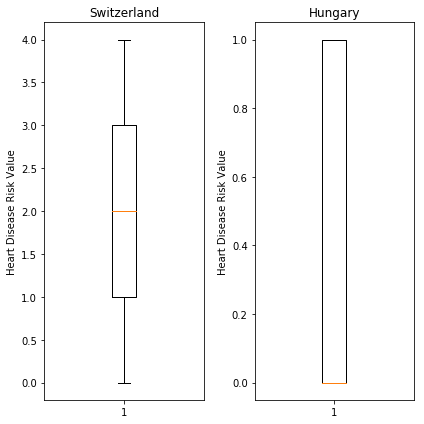

In [18]:
df_swtz_clean = df_swtz_remove_outliers["PredHrtDis"]

df_hun["hun_hdv"] = pd.read_csv('hungarian.names.csv', usecols=[13])

plt.figure(figsize=(6,6)) # Create Box and Whisker plot of Heart Disease Risk to check for the presence of outliers

plt.subplot(1, 2, 1)
plt.boxplot(df_swtz_clean)
plt.ylabel('Heart Disease Risk Value')
plt.title('Switzerland')

plt.subplot(1, 2, 2)
plt.boxplot(df_hun["hun_hdv"])
plt.ylabel('Heart Disease Risk Value')
plt.title('Hungary')

plt.tight_layout()
plt.show()


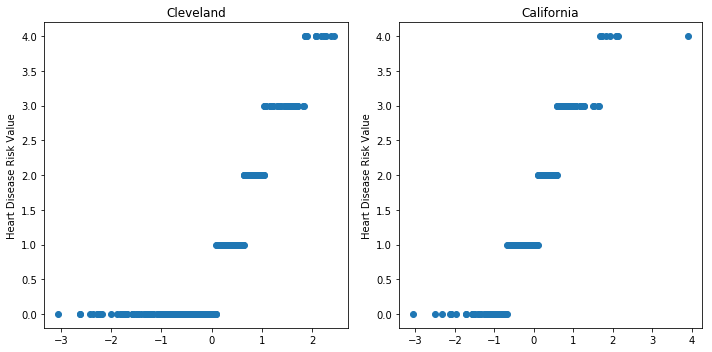

In [19]:
sorted_clv_hd_values = df_clv["clv_hdv"].sort_values(axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

sorted_lngb_hd_values = df_lngb_clean.sort_values(axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
                                                            # Sort Heart Disease Values numerically with quicksort 
norm1 = np.random.normal(0, 1, len(sorted_clv_hd_values)) # Create random normal set to chart against HD data
norm1.sort()
norm2 = np.random.normal(0, 1, len(df_lngb_clean))
norm2.sort()

plt.figure(figsize=(10, 5)) # Create QQplot to investigate the normality of Heart Disease data 

plt.subplot(1, 2, 1)
plt.plot(norm1, sorted_clv_hd_values, "o")
plt.ylabel('Heart Disease Risk Value')
plt.title('Cleveland')

plt.subplot(1, 2, 2)
plt.plot(norm2, sorted_lngb_hd_values, "o")
plt.ylabel('Heart Disease Risk Value')
plt.title('California')

plt.tight_layout()
plt.show()

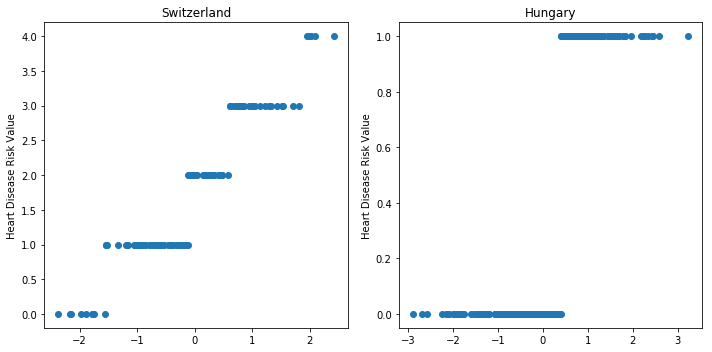

In [26]:
sorted_swtz_hd_values = df_swtz_clean.sort_values(axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

sorted_hun_hd_values = df_hun["PredHrtDis"].sort_values(axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
                                                            # Sort Heart Disease Values numerically with quicksort
norm3 = np.random.normal(0, 1, len(df_swtz_clean)) # Create random normal set to chart against HD data 
norm3.sort()
norm4 = np.random.normal(0, 1, len(sorted_hun_hd_values))
norm4.sort()

plt.figure(figsize=(10, 5)) # Create QQplot to investigate the normality of Heart Disease data 

plt.subplot(1, 2, 1)
plt.plot(norm3, sorted_swtz_hd_values, "o",)
plt.ylabel('Heart Disease Risk Value')
plt.title('Switzerland')

plt.subplot(1, 2, 2)
plt.plot(norm4, sorted_hun_hd_values, "o",)
plt.ylabel('Heart Disease Risk Value')
plt.title('Hungary')

plt.tight_layout()
plt.show()

Creating a simple function to return the means and standard deviations of a risk value data frame with respect to each location, we already see the Hungarian Institute with an average risk value and standard deviation set itself far apart from the other three locations. While the Cleveland dataset's average is also well below the remaining contenders, its standard deviation follows inline with California and Switzedland. 
Thus far, we have an idea from our analysis that these calculations speak to the true results of each dataset, however I believe a T-test is necessary to investigate further. 

In [22]:
def mean_and_std(location,df): # Create function to return mean and standard deviation of given data
    return (location + " mean and standard deviation:\nmean = {}\nstd = {}\n".format(np.mean(df),df.std()))

print(mean_and_std("Cleveland",df_clv["PredHrtDis"]))
print(mean_and_std("Long Beach VA",df_lngb_clean))
print(mean_and_std("Switzerland",df_swtz_clean))
print(mean_and_std("Hungary",df_hun["PredHrtDis"]))

Cleveland mean and standard deviation:
mean = 0.9372937293729373
std = 1.2285356879701044

Long Beach VA mean and standard deviation:
mean = 1.5591397849462365
std = 1.2032601263674862

Switzerland mean and standard deviation:
mean = 1.8220338983050848
std = 1.018053748452664

Hungary mean and standard deviation:
mean = 0.36054421768707484
std = 0.4809770804966045



Creating another function using the t-test module from the SciPy library, each locations risk value data frame are compared to every other location. We remember a t-statistic refects how many standard errors worth of space separates the compared means. And that a small p-value reflects a specific sample to be more likely a meaningful description of its respective population, and not a characteristic of variablilty in the sample collection.

As such, the T-test results return overall values that trend in small p-values and large t-statistics. From these calculations I infer that the means and standard devaitons that were calculated previously speak to the true true measures of each location's dataset. 

In [84]:
from scipy.stats import ttest_ind # import scipy library for t-test 

def t_test(df_1, df_2): # Create function to run two data sets and return test statistic and p-value 
        return ttest_ind(df_1, df_2, equal_var=False) 

print("Cleveland vs Long beach VA:\n{}\n".format(t_test(df_clv["PredHrtDis"], df_lngb_clean)))
print("Cleveland vs Switzerland:\n{}\n".format(t_test(df_clv["PredHrtDis"], df_swtz_clean)))
print("Cleveland vs Hungary:\n{}\n".format(t_test(df_clv["PredHrtDis"], df_hun["PredHrtDis"])))
print("Long beach VA vs Switzerland:\n{}\n".format(t_test(df_lngb_clean, df_swtz_clean)))
print("Long beach VA vs Hungary:\n{}\n".format(t_test(df_lngb_clean, df_hun["PredHrtDis"])))
print("Switzerland vs Hungary:\n{}\n".format(t_test(df_swtz_clean, df_hun["PredHrtDis"])))

Cleveland vs Long beach VA:
Ttest_indResult(statistic=-5.5038714016807715, pvalue=6.670879099259733e-08)

Cleveland vs Switzerland:
Ttest_indResult(statistic=-7.541108281440142, pvalue=8.145666912713882e-13)

Cleveland vs Hungary:
Ttest_indResult(statistic=7.594033970762158, pvalue=2.265481917609552e-13)

Long beach VA vs Switzerland:
Ttest_indResult(statistic=-2.042461010769659, pvalue=0.04204871155403733)

Long beach VA vs Hungary:
Ttest_indResult(statistic=12.946691381955537, pvalue=5.867544146933868e-29)

Switzerland vs Hungary:
Ttest_indResult(statistic=14.939470844555224, pvalue=1.1675453409399648e-30)



With outliers removed and in consideration of the T-test relults, I conclude that all datasets reflect meaningful averages and standard deviations, and further the calculations for the Hungarian Institute of Cardiology reflect divergent result from the remaining location's. 

## Question 2

To image the relationship between a location's age data and heart disease risk data, I create a simple scatter plot  from age and risk data frames of each location.

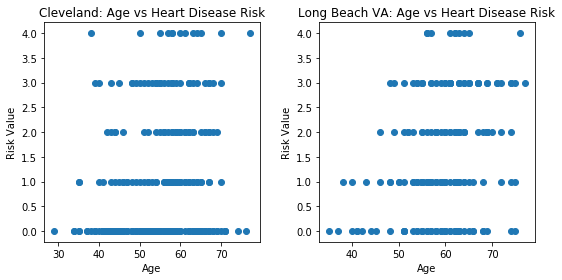

In [32]:
plt.figure(figsize=(8,4)) # Create Scatter plot to investigate relationship between Age and Heart Disease data

plt.subplot(1, 2, 1)
plt.scatter(x=df_clv['Age'], y=df_clv['PredHrtDis'])
plt.title('Cleveland: Age vs Heart Disease Risk')
plt.xlabel('Age')
plt.ylabel('Risk Value')

plt.subplot(1, 2, 2)
plt.scatter(x=df_lngb['Age'], y=df_lngb['PredHrtDis'])
plt.title('Long Beach VA: Age vs Heart Disease Risk')
plt.xlabel('Age')
plt.ylabel('Risk Value')

plt.tight_layout()
plt.show()


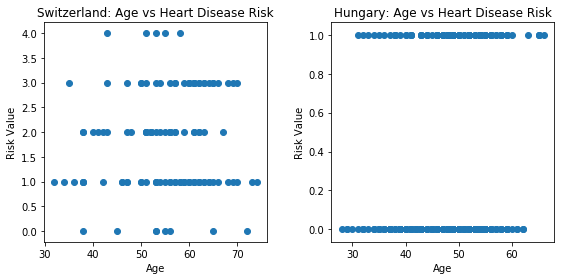

In [33]:
plt.figure(figsize=(8,4)) # Create Scatter plot to investigate relationship between Age and Heart Disease data

plt.subplot(1, 2, 1)
plt.scatter(x=df_swtz['Age'], y=df_swtz['PredHrtDis'])
plt.title('Switzerland: Age vs Heart Disease Risk')
plt.xlabel('Age')
plt.ylabel('Risk Value')

plt.subplot(1, 2, 2)
plt.scatter(x=df_hun['Age'], y=df_hun['PredHrtDis'])
plt.title('Hungary: Age vs Heart Disease Risk')
plt.xlabel('Age')
plt.ylabel('Risk Value')

plt.tight_layout()
plt.show()

These scatter plots show us the predicted heart disease risk vs age. If age of was a standout indicator for predicting heart disease we would notice a definite trend in the data points on the plot. We see a slight tendency in the data of the Long Beach VA dataset, as there is a higher concentration of data points in older ages. However, in the majority of instances, the spread of risk values seem to be fairly evenly distributed across the years. 

## Question 3

To calculate the probability a patient with cholesterol levels greater than 200 mg/dL would be assigned a risk value greater than the location average, I construct a simple result of data frame counts with respect to cholesterol level and the amount of those counts that come from patients with greater than average risk levels. 

The Switzerland dataset could not be used in this calculation since it did ot include patient cholesterol level data.

In [51]:
clv_chol_v_hrt_dis = df_clv[['Chol','PredHrtDis']] # Create parsed data frame with only Cholesterol and HD data

clv_hrt_dis = df_clv['PredHrtDis']
print("Cleveland average heart disease risk = {}\n".format(np.mean(clv_hrt_dis))) # Calculate mean HD risk

clv_hdv_grt_avrg = clv_chol_v_hrt_dis[clv_chol_v_hrt_dis.PredHrtDis > 1]

clv_chol_grt200 = clv_chol_v_hrt_dis[clv_chol_v_hrt_dis.Chol > 200] # Count patients with >200 chol. levels 

print("Total number of patients with levels over 200 mg/dL:\n{}\n".format(clv_chol_grt200.count()))

print("Total number of patients with chol. levels over 200 and given a Heart Disease value over the group average:\n{}".format(clv_chol_grt200[clv_chol_grt200.PredHrtDis > 1.0].count()))
                            # Count the amount of >200 patients that also have greater than average HD risk 

prob_risk = clv_chol_grt200[clv_chol_grt200.PredHrtDis > 1.0].count() / clv_chol_grt200.count()
                            # Calculate the percentage of >200 chol. with >avg Heart Disease risk

print("\nProbability of a greater than average risk Heart Diease:\n{}".format(prob_risk))
            

Cleveland average heart disease risk = 0.9372937293729373

Total number of patients with levels over 200 mg/dL:
Chol          253
PredHrtDis    253
dtype: int64

Total number of patients with chol. levels over 200 and given a Heart Disease value over the group average:
Chol          70
PredHrtDis    70
dtype: int64

Probability of a greater than average risk Heart Diease:
Chol          0.27668
PredHrtDis    0.27668
dtype: float64


In [35]:
df_lngb = pd.read_csv('cleaned.va.csv', sep=',')

lngb_chol_v_hrt_dis = df_lngb[['Chol','PredHrtDis']] # Create parsed data frame with only Cholesterol and HD data

lngb_hrt_dis = df_lngb_clean
print("Long Beach VA average heart disease risk = {}\n".format(np.mean(lngb_hrt_dis))) # Calculate mean HD risk

lngb_chol_grt200 = lngb_chol_v_hrt_dis[lngb_chol_v_hrt_dis.Chol > 200] # Count patients with >200 chol. levels

print("Total number of patients with levels over 200 mg/dL:\n{}\n".format(lngb_chol_grt200.count()))

print("Total number of patients with chol. levels over 200 and given a Heart Disease value over the group average:\n{}".format(lngb_chol_grt200[lngb_chol_grt200.PredHrtDis > 2.0].count()))
                            # Count the amount of >200 patients that also have greater than average HD risk 

prob_risk = lngb_chol_grt200[lngb_chol_grt200.PredHrtDis > 2.0].count() / lngb_chol_grt200.count()
                            # Calculate the percentage of >200 chol. with >avg Heart Disease risk
print("\nProbability of a greater than average risk Heart Diease:\n{}".format(prob_risk))
            


Long Beach VA average heart disease risk = 1.5591397849462365

Total number of patients with levels over 200 mg/dL:
Chol          117
PredHrtDis    117
dtype: int64

Total number of patients with chol. levels over 200 and given a Heart Disease value over the group average:
Chol          35
PredHrtDis    35
dtype: int64

Probability of a greater than average risk Heart Diease:
Chol          0.299145
PredHrtDis    0.299145
dtype: float64


In [36]:
df_hun = pd.read_csv('cleaned.hungarian.csv', sep=',')

hun_chol_v_hrt_dis = df_hun[['Chol','PredHrtDis']] # Create parsed data frame with only Cholesterol and HD data

hun_hrt_dis = df_hun['PredHrtDis']
print("Hungarian average heart disease risk = {}\n".format(np.mean(hun_hrt_dis))) # Calculate mean HD risk

hun_chol_grt200 = hun_chol_v_hrt_dis[hun_chol_v_hrt_dis.Chol > 200] # Count patients with >200 chol. levels

print("Total number of patients with levels over 200 mg/dL:\n{}\n".format(hun_chol_grt200.count()))

print("Total number of patients with chol. levels over 200 and given a Heart Disease value over the group average:\n{}".format(hun_chol_grt200[hun_chol_grt200.PredHrtDis > 0].count()))
                            # Count the amount of >200 patients that also have greater than average HD risk 

prob_risk = hun_chol_grt200[hun_chol_grt200.PredHrtDis > 0.0].count() / hun_chol_grt200.count()
                            # Calculate the percentage of >200 chol. with >avg Heart Disease risk
    
print("\nProbability of a greater than average risk Heart Diease:\n{}".format(prob_risk))



Hungarian average heart disease risk = 0.36054421768707484

Total number of patients with levels over 200 mg/dL:
Chol          216
PredHrtDis    216
dtype: int64

Total number of patients with chol. levels over 200 and given a Heart Disease value over the group average:
Chol          88
PredHrtDis    88
dtype: int64

Probability of a greater than average risk Heart Diease:
Chol          0.407407
PredHrtDis    0.407407
dtype: float64


From these results we see that the patients from the California VA at .277 and Cleveland Clinic .299 were similar in probability that a patient with a cholesterol level of 200 mg/dL would have a higher than average assigned risk value. And further we see patients from the Hungarian Instititute with a much higher probability at .407. 

## Conclusions

Throughout investigation of each location's data, small differences in results have combined to form a broader image of the true nature of each dataset. Suprisingly regardless of age, we see similar distributions of Heart Disease risk shared amongst the patient collection. Markedly, the Hungarian Institute's results diverge from the remaining locations. An explanation may be that when the heart disease risk values were assigned, they may of been given on a binary scale, as such a 0 value for no suspected risk and a 1 value for a suspected risk, regardless of severity of such a risk. This would also explain the higher probablity of a risk value over the mean risk if a patient has a cholesterol level over 200 in Hungarian patients. 

Further or more rigous research might include an explanation of the patient selection process. As the locations and institutes vary so greatly, surley this information would benefit from more context. I would also like to see a study conducted present day, a contemporary investigation may include more scientifically advanced indictors and more meaningful attributes.  